In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import shutil
import time
import copy

In [2]:
# dest_folder (裡面包括test、train兩資料夾以及train.csv、test.csv)
!ls "D:/NTUEE/g1s/電資工程設計與實作(車車課)/自選專題 Arduino/Model_Generator/experiements/dest_folder/"

'ls' ���O�����Υ~���R�O�B�i���檺�{���Χ妸�ɡC


In [3]:
torch.cuda.empty_cache() # 釋放占用的GPU記憶體
torch.backends.cudnn.benchmark=True # 讓cuDNN尋找最快速的卷積演算法 (如果沒裝CUDA應該就不會裝cuDNN，所以應該就刪掉它)

In [4]:
### Creating image datasets an data loaders for train and test using the experiments folder split

In [5]:
experiments_path = "D:/NTUEE/g1s/電資工程設計與實作(車車課)/自選專題 Arduino/Model_Generator/experiements/dest_folder/" # dest_folder
data_path = "D:/NTUEE/g1s/電資工程設計與實作(車車課)/自選專題 Arduino/Model_Generator/experiements/data/" # data

In [6]:
# 用來按照train.csv或test.csv內容取得.jpg圖檔在data資料夾中的路徑、類型
def get_train_files_path(experiments_path, data_path, phase):
    if phase == 'train':
        file_name = 'train.csv'
    elif phase == 'test':
        file_name = 'test.csv'
    else:
        print("phase can only have train and test as parameter values")
        exit()
    file_path = os.path.join(experiments_path, file_name) # train.csv或test.csv的路徑
    train_df = pd.read_csv(file_path, delimiter=',') # CSV = Comma-Separated Values
    files_path = []
    fonts_class = []
    for row in train_df.iterrows():
        files_path.append(os.path.join(data_path, row[1]['class'], row[1]['filename'])) # 圖檔在with_mask或without_mask資料夾中的路徑
        fonts_class.append(row[1]['class']) # 圖檔類型(with_mask, without_mask)
    
    return files_path, fonts_class # 回傳圖檔路徑、類型

In [7]:
# 用來將.jpg圖檔從data資料夾複製到train或test資料夾中的with_mask和without_mask子資料夾
def copy_images_to_path(file_path, file_class, destination_dir):
    font_folder = os.path.join(destination_dir, file_class) #train或test資料夾路徑
    # 若with_mask、without_mask資料夾不存在，新增資料夾
    if os.path.exists(font_folder) == False:
        os.makedirs(font_folder)
    
    print("File being copied from {}:{}".format(file_path, font_folder))
    shutil.copy(file_path, font_folder) # 從data資料夾複製圖檔(包含存取權)到train或test資料夾
    

In [8]:
# 由train.csv取得train資料夾的.jpg圖檔在data資料夾中的路徑和類型(with_mask, without_mask)
X_train, y_train = get_train_files_path(experiments_path, data_path, phase='train') 
# 由test.csv取得test資料夾的.jpg圖檔在data資料夾中的路徑和類型(with_mask, without_mask)
X_test, y_test = get_train_files_path(experiments_path, data_path, phase='test')

In [9]:
train_dir = os.path.join(experiments_path, 'train') # trsin資料夾路徑
test_dir = os.path.join(experiments_path, 'test') # test資料夾路徑
# 若train資料夾不存在，新增資料夾
if not os.path.exists(train_dir):
    os.makedirs(train_dir)
# 若test資料夾不存在，新增資料夾
if not os.path.exists(test_dir):
    os.makedirs(test_dir)

In [10]:
# 將.jpg圖檔從data資料夾複製到train資料夾
for file_path, font_class in zip(X_train, y_train):
    copy_images_to_path(file_path, font_class, train_dir)

hout_mask
File being copied from D:/NTUEE/g1s/電資工程設計與實作(車車課)/自選專題 Arduino/Model_Generator/experiements/data/without_mask\augmented_image_301.jpg:D:/NTUEE/g1s/電資工程設計與實作(車車課)/自選專題 Arduino/Model_Generator/experiements/dest_folder/train\without_mask
File being copied from D:/NTUEE/g1s/電資工程設計與實作(車車課)/自選專題 Arduino/Model_Generator/experiements/data/without_mask\augmented_image_302.jpg:D:/NTUEE/g1s/電資工程設計與實作(車車課)/自選專題 Arduino/Model_Generator/experiements/dest_folder/train\without_mask
File being copied from D:/NTUEE/g1s/電資工程設計與實作(車車課)/自選專題 Arduino/Model_Generator/experiements/data/without_mask\augmented_image_303.jpg:D:/NTUEE/g1s/電資工程設計與實作(車車課)/自選專題 Arduino/Model_Generator/experiements/dest_folder/train\without_mask
File being copied from D:/NTUEE/g1s/電資工程設計與實作(車車課)/自選專題 Arduino/Model_Generator/experiements/data/without_mask\augmented_image_304.jpg:D:/NTUEE/g1s/電資工程設計與實作(車車課)/自選專題 Arduino/Model_Generator/experiements/dest_folder/train\without_mask
File being copied from D:/NTUEE/g1s/電資工程設計與實作(

In [11]:
# 將.jpg圖檔從data資料夾複製到test資料夾
for file_path, font_class in zip(X_test, y_test):
    copy_images_to_path(file_path, font_class, test_dir)

/電資工程設計與實作(車車課)/自選專題 Arduino/Model_Generator/experiements/dest_folder/test\without_mask
File being copied from D:/NTUEE/g1s/電資工程設計與實作(車車課)/自選專題 Arduino/Model_Generator/experiements/data/without_mask\129.jpg:D:/NTUEE/g1s/電資工程設計與實作(車車課)/自選專題 Arduino/Model_Generator/experiements/dest_folder/test\without_mask
File being copied from D:/NTUEE/g1s/電資工程設計與實作(車車課)/自選專題 Arduino/Model_Generator/experiements/data/without_mask\133.jpg:D:/NTUEE/g1s/電資工程設計與實作(車車課)/自選專題 Arduino/Model_Generator/experiements/dest_folder/test\without_mask
File being copied from D:/NTUEE/g1s/電資工程設計與實作(車車課)/自選專題 Arduino/Model_Generator/experiements/data/without_mask\134.jpg:D:/NTUEE/g1s/電資工程設計與實作(車車課)/自選專題 Arduino/Model_Generator/experiements/dest_folder/test\without_mask
File being copied from D:/NTUEE/g1s/電資工程設計與實作(車車課)/自選專題 Arduino/Model_Generator/experiements/data/without_mask\143.jpg:D:/NTUEE/g1s/電資工程設計與實作(車車課)/自選專題 Arduino/Model_Generator/experiements/dest_folder/test\without_mask
File being copied from D:/NTUEE/g1s/

In [12]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224), # 將圖片隨機裁剪成(224,224)的大小
        transforms.ToTensor(), # 轉換成Tensor (torch.Tensor是同種資料類型的多維矩陣)
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # 標準化：torchvision.transforms.Normalize(mean, std) (output[i] = (input[i]-mean[i])/std[i])
    ]), 
    'test' : transforms.Compose([
        transforms.Resize(256), # 將圖片縮放成(256,256)
        transforms.CenterCrop(224), # 從中央將圖片裁剪成(224,224)
        transforms.ToTensor(), # 轉換成Tensor
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # 標準化
    ])
}

In [13]:
# 建立數據集字典image_datasets，包含數據集train和test，內容分別是train和test資料夾中經過轉換的圖檔
image_datasets = {x: datasets.ImageFolder(os.path.join(experiments_path, x), data_transforms[x]) for x in ['train', 'test']}

In [14]:
# 顯示數據集train的內容
image_datasets['train']

Dataset ImageFolder
    Number of datapoints: 1315
    Root location: D:/NTUEE/g1s/電資工程設計與實作(車車課)/自選專題 Arduino/Model_Generator/experiements/dest_folder/train
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [15]:
# 顯示數據集test的內容
image_datasets['test']

Dataset ImageFolder
    Number of datapoints: 194
    Root location: D:/NTUEE/g1s/電資工程設計與實作(車車課)/自選專題 Arduino/Model_Generator/experiements/dest_folder/test
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=bilinear)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [16]:
# 定義dataloader字典
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], 
                                             batch_size=14, # 一次讀取的資料數(訓練時每次平行處理1 batch的資料) (若GPU記憶體無法負荷則改小)
                                             shuffle=True, # reshuffle the data at every epoch
                                             num_workers=4) # 載入檔案所用的子進程(subprocess)數
               for x in ['train', 'test']}

In [17]:
dataloaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x24132f0ed30>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x24132f0e220>}

In [18]:
class_names = image_datasets['train'].classes # with_mask、without_mask

In [19]:
class_names

['with_mask', 'without_mask']

In [20]:
# 指定資料記憶體位置(應該可以理解成處理的裝置)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [21]:
device

device(type='cuda', index=0)

In [22]:
# 數據集大小(圖片數)
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'test']}


In [23]:
dataset_sizes['train']

1315

In [24]:
dataset_sizes['test']

194

### Visualizing images (not the must)

In [25]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = (inp-mean)/std
    inp = np.clip(inp, 0, 1)
    plt.figure(figsize=(20,20))
    plt.imshow(inp)

    if title is not None:
        plt.title(title)
    plt.pause(0.001)
    

In [26]:
inputs, classes = next(iter(dataloaders['train']))
out = torchvision.utils.make_grid(inputs)

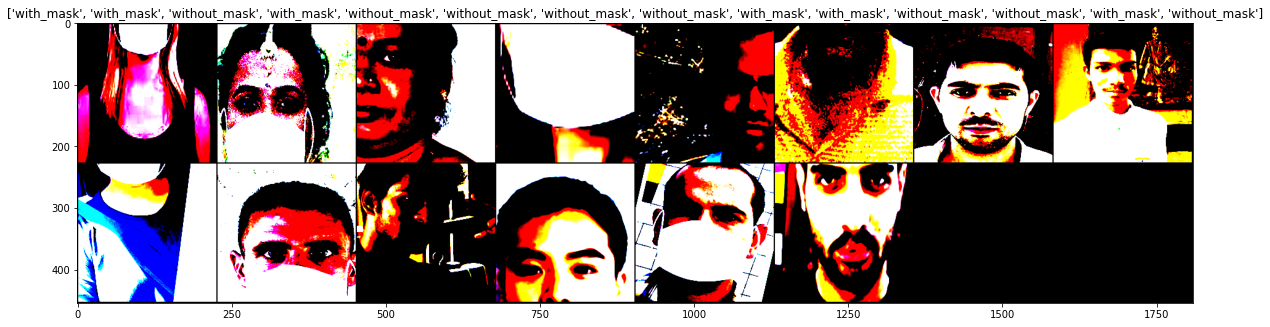

In [27]:
imshow(out, title=[class_names[x] for x in classes])

### Training the model

In [28]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=1):
    since = time.time() # 訓練開始時間
    best_acc = 0.0 # 紀錄最佳精確度
    best_model = copy.deepcopy(model.state_dict()) #紀錄最佳模型
    
    new_freeze_state = None
    prev_freeze_state = False
    for epoch in range(num_epochs):
        print("Epoch {}/{}".format(epoch, num_epochs - 1)) # print "Epoch 0/19", for example
        print('-' * 10)
        
        for phase in ['train', 'test']:
            if phase == 'train':
                model.train() # 設為訓練模式
            else:
                model.eval() # 設為評估模式
                
            running_loss = 0.0
            running_corrects = 0.0

            for inputs, labels in dataloaders[phase]:
                # 將inputs(影像)、labels(標籤，with_mask、without_mask)轉移到device
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                optimizer.zero_grad() # 梯度歸零
        
                with torch.set_grad_enabled(phase == 'train'): # 若phase == 'train'，啟動梯度運算
                    outputs = model(inputs) #　取得模型輸出結果
                    _, preds = torch.max(outputs, 1) # 回傳outputs(Tensor)中(每行元素中的最大值,在該行中的位置(列索引))，資料類型：tensor
                    loss = criterion(outputs, labels) # 用損失函數計算loss，loss是一個tensor
                    
                    if phase == 'train':
                        loss.backward() # 計算梯度
                        optimizer.step() # 讓optimizer可以做事(利用損失函數優化模型)
                        scheduler.step() # 讓scheduler可以做事(依照設定調整學習率)
                        
                running_loss += loss.item() * inputs.size(0) # lose.item()將loss從tensor轉成float32，loss.item()*batchsize = loss in abatch
                running_corrects += torch.sum(preds == labels.data) # 計算模型結果與實際的相似度(？)
            
            epoch_loss = running_loss / dataset_sizes[phase] # 此epoch中的損失(與真實數據的落差)
            epoch_acc = running_corrects.double() / dataset_sizes[phase] # 此epoch中的精確度
            
            print('{} Loss: {:.4f} Acc:{:.4f}'.format(
                phase, epoch_loss, epoch_acc))
            
            # 若此次訓練模型較好，則取代舊模型
            if phase == 'test' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model = copy.deepcopy(model.state_dict()) # 紀錄最佳模型
            
            print()
    
    time_elapsed = time.time() - since # 訓練總時間
    print('Training complete in {:0f}m {:.0f}s'.format(
    time_elapsed // 60, time_elapsed % 60))
    print('Best val acc: {:4f}'.format(best_acc))
    
    model.load_state_dict(best_model) # 加載模型
    return model
                

In [29]:
 # 使用已訓練的模型：resnet101
model_ft = models.resnet101(pretrained=True)

# 修改resnet101模型
num_frts = model_ft.fc.in_features # 提取fc層的固定參數
model_ft.fc = nn.Linear(num_frts, len(class_names)) # 將維度從num_frts修改為len(class_names)=2，也就是將原本resnet101模型的fc層1000種類別改成我們要的兩種類別：with_maask、without_mask

model_ft = model_ft.to(device) #將模型轉移到device('cpu'或'cuda')上
criterion = nn.CrossEntropyLoss() # 使用損失函數CrossEntropyLoss()，loss可代表模型與實際狀況的誤差

optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.01, momentum=0.9) # 使用SGD優化算法，lr(learing rate) = 0.01，動量 = 0.9
# V = beta*V-lr*(dCriterion/dWeight)，W = W + V
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1) # 使用學習率調整函數StepLR()，每step_size個epoch會將學習率調整為gamma倍

In [30]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=20) # 訓練模型

Epoch 0/19
----------
train Loss: 0.2495 Acc:0.8920



In [ ]:
torch.save(model_ft, "D:/NTUEE/g1s/電資工程設計與實作(車車課)/自選專題 Arduino/Model_Generator/mask_recognition_model1.pth") # 儲存模型為.pth檔